In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
from xgboost import XGBClassifier

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, mean_absolute_error
)
import joblib
import os

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\Traffic_prediction\dataset\dataset\dataset_traffic_accident_prediction1.csv')
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [3]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [5]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

Traffic_Density - Average: 1.0012531328320802, Median: 1.0


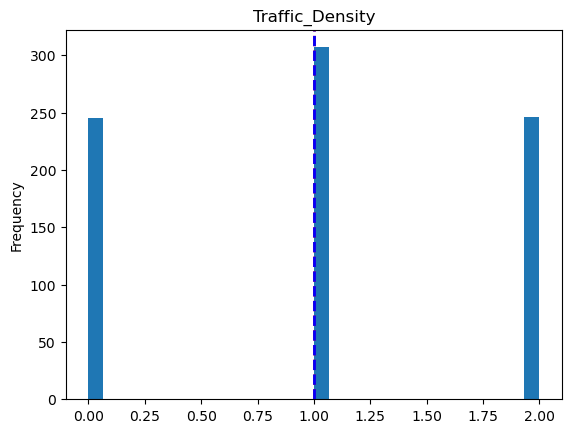

Speed_Limit - Average: 71.0501253132832, Median: 60.0


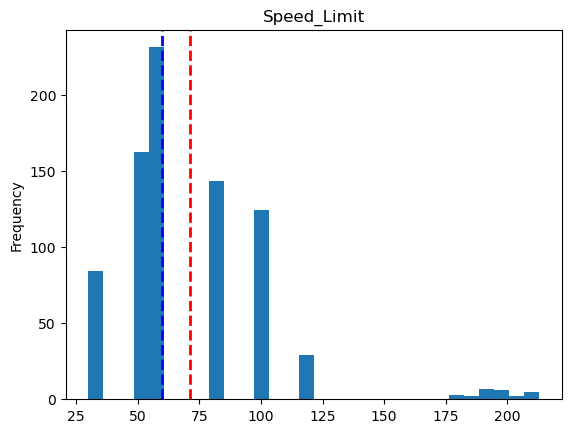

Number_of_Vehicles - Average: 3.2869674185463658, Median: 3.0


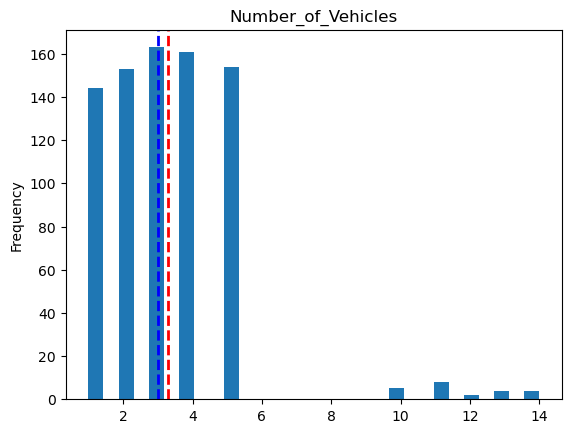

Driver_Alcohol - Average: 0.16040100250626566, Median: 0.0


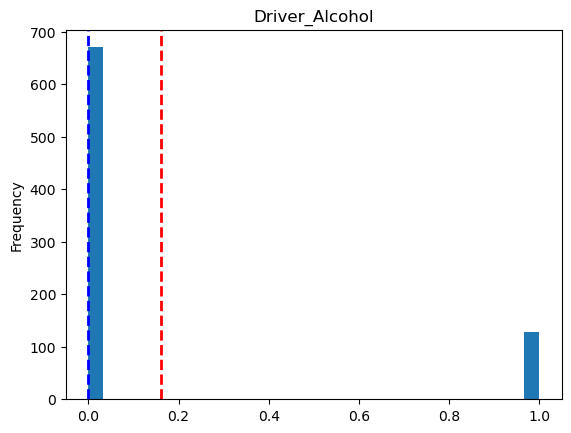

Driver_Age - Average: 43.2593984962406, Median: 43.0


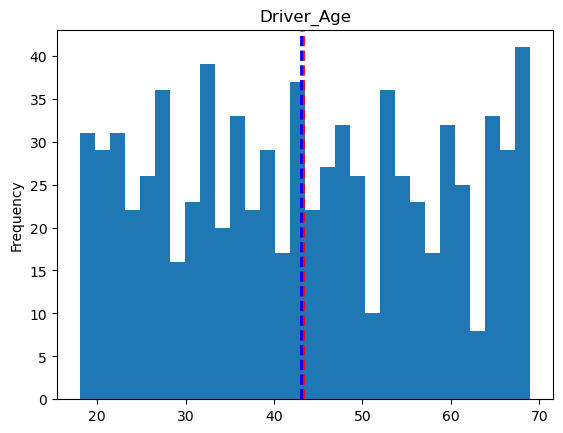

Driver_Experience - Average: 38.9812030075188, Median: 39.0


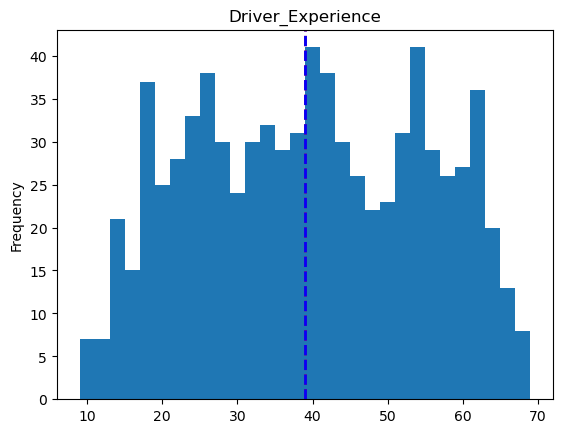

Accident - Average: 0.29949874686716793, Median: 0.0


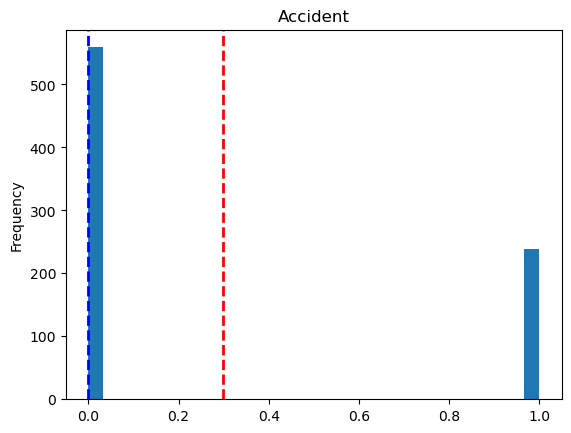

In [6]:
columns_with_missing = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol',
                       'Driver_Age', 'Driver_Experience',
                       'Accident']

for i in columns_with_missing:
    print(f"{i} - Average: {df[i].mean()}, Median: {df[i].median()}")
    df[i].plot(kind='hist', bins=30, title=i)
    plt.axvline(df[i].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(df[i].median(), color='blue', linestyle='dashed', linewidth=2)
    plt.show()

In [7]:
df['Traffic_Density'].fillna(df['Traffic_Density'].median(), inplace=True)
df['Speed_Limit'].fillna(df['Speed_Limit'].median(), inplace=True)
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median(), inplace=True)
df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].median(), inplace=True)
df['Driver_Age'].fillna(df['Driver_Age'].median(), inplace=True)
df['Driver_Experience'].fillna(df['Driver_Experience'].median(), inplace=True)
df['Accident'].fillna(df['Accident'].median(), inplace=True)

In [8]:
columns_miss = df.columns[df.isnull().sum() > 0]

df[columns_miss].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Weather               798 non-null    object
 1   Road_Type             798 non-null    object
 2   Time_of_Day           798 non-null    object
 3   Accident_Severity     798 non-null    object
 4   Road_Condition        798 non-null    object
 5   Vehicle_Type          798 non-null    object
 6   Road_Light_Condition  798 non-null    object
dtypes: object(7)
memory usage: 46.1+ KB


In [9]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0])
df['Road_Condition'] = df['Road_Condition'].fillna(df['Road_Condition'].mode()[0])
df['Vehicle_Type'] = df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode()[0])
df['Road_Light_Condition'] = df['Road_Light_Condition'].fillna(df['Road_Light_Condition'].mode()[0])

In [10]:
df.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

Handle Duplicate

In [11]:
df = df.drop_duplicates()

In [12]:
duplicates_count1 = df.duplicated().sum()
print(f"Duplicates values : {duplicates_count1}")

Duplicates values : 0


In [14]:
import seaborn as sns

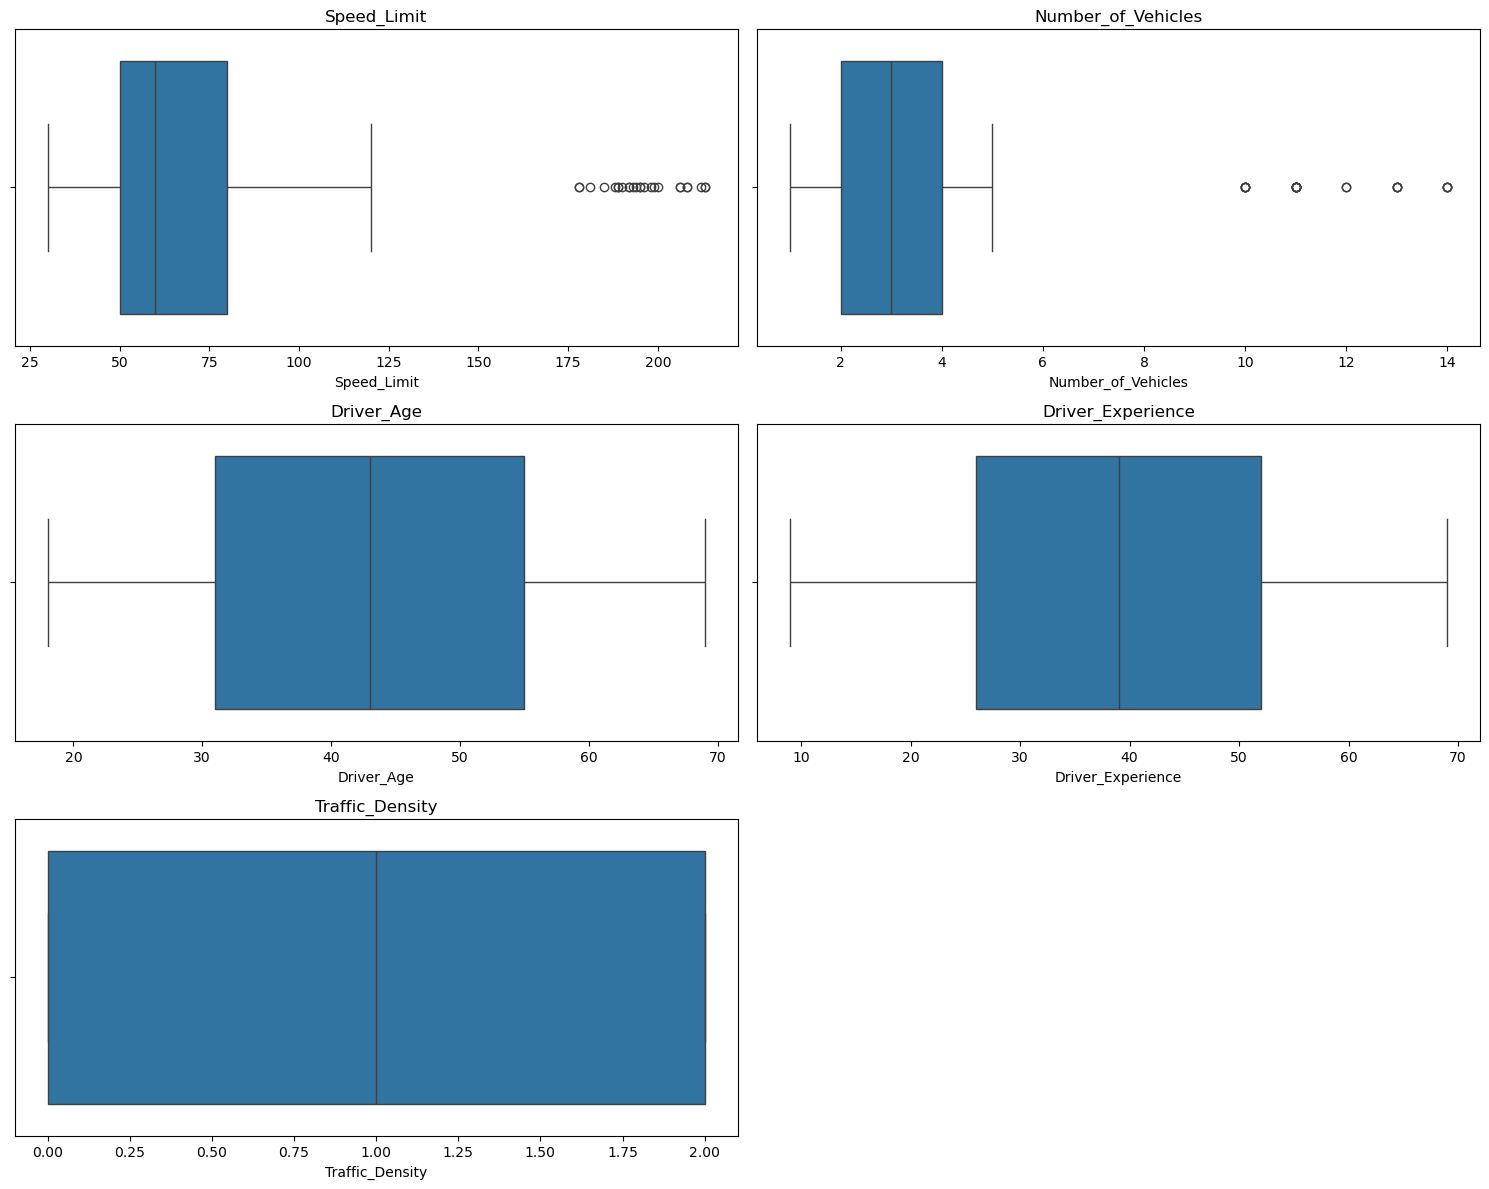

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

sns.boxplot(x=df['Speed_Limit'], ax=axes[0, 0])
axes[0, 0].set_title('Speed_Limit')

sns.boxplot(x=df['Number_of_Vehicles'], ax=axes[0, 1])
axes[0, 1].set_title('Number_of_Vehicles')

sns.boxplot(x=df['Driver_Age'], ax=axes[1, 0])
axes[1, 0].set_title('Driver_Age')

sns.boxplot(x=df['Driver_Experience'], ax=axes[1, 1])
axes[1, 1].set_title('Driver_Experience')

sns.boxplot(x=df['Traffic_Density'], ax=axes[2, 0])
axes[2, 0].set_title('Traffic_Density')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

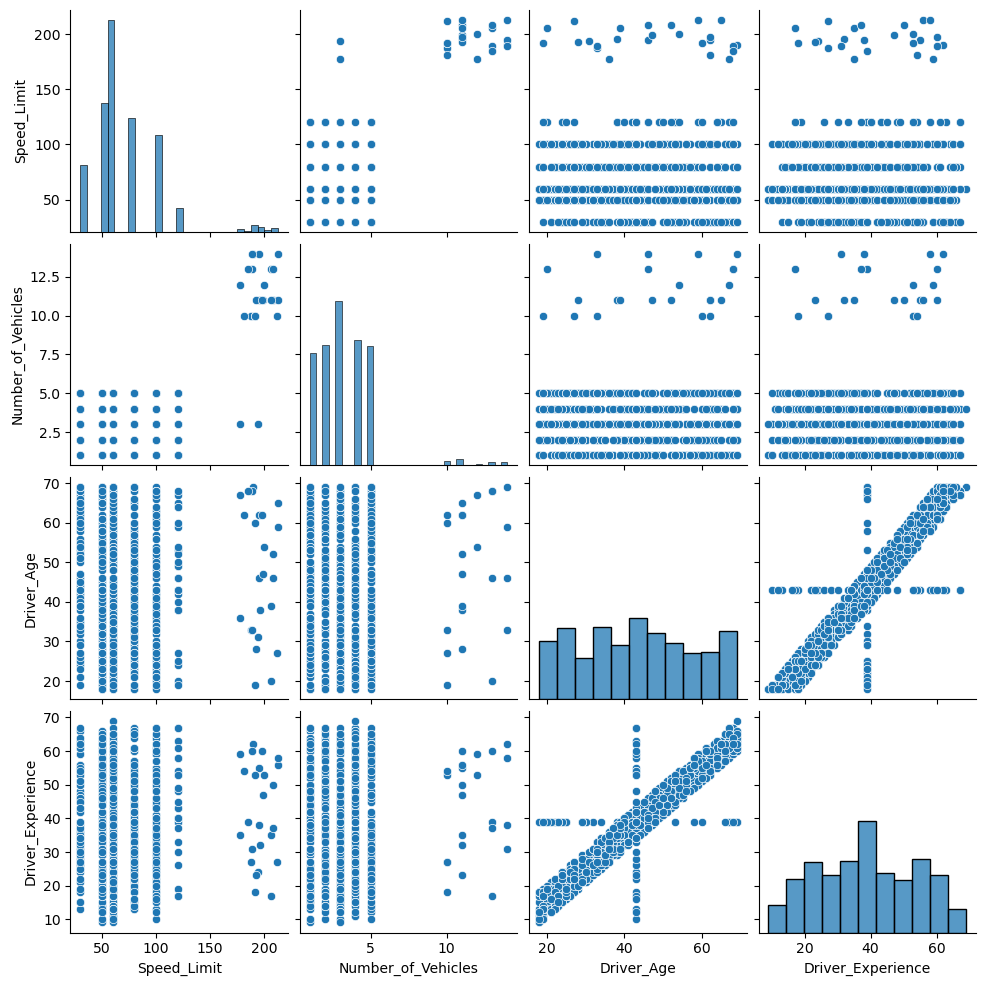

In [16]:
cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot2.png')

                    Traffic_Density  Speed_Limit  Number_of_Vehicles  \
Traffic_Density            1.000000    -0.045265           -0.030647   
Speed_Limit               -0.045265     1.000000            0.076297   
Number_of_Vehicles        -0.030647     0.076297            1.000000   
Driver_Alcohol            -0.022652    -0.037757           -0.030421   
Driver_Age                -0.005930    -0.036819           -0.024255   
Driver_Experience         -0.002173    -0.035221           -0.013461   
Accident                  -0.001008    -0.028651            0.036608   

                    Driver_Alcohol  Driver_Age  Driver_Experience  Accident  
Traffic_Density          -0.022652   -0.005930          -0.002173 -0.001008  
Speed_Limit              -0.037757   -0.036819          -0.035221 -0.028651  
Number_of_Vehicles       -0.030421   -0.024255          -0.013461  0.036608  
Driver_Alcohol            1.000000    0.025207           0.026769  0.012788  
Driver_Age                0.02520

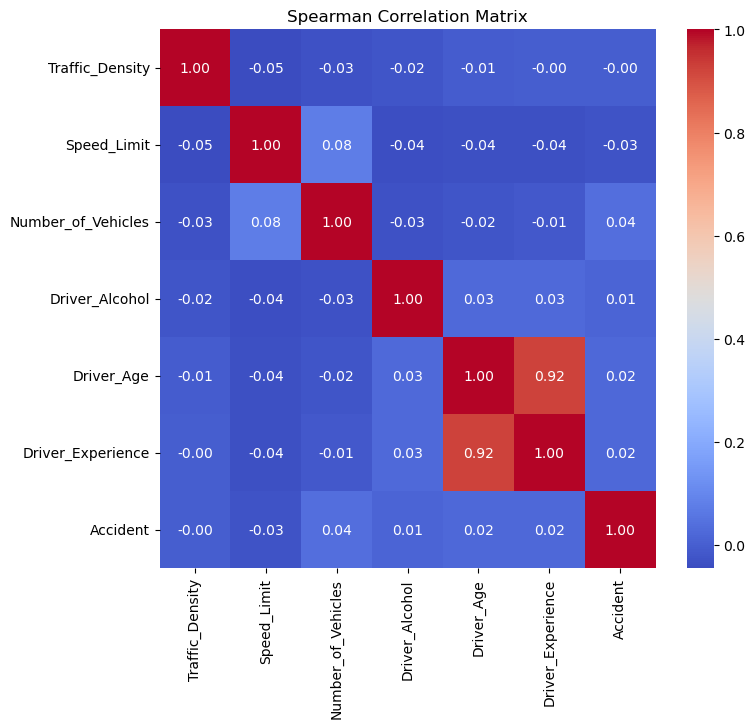

In [17]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

print(spearman_corr)


plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [18]:
df = pd.get_dummies(df, columns=['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 
                                  'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'], drop_first=True)

In [19]:
df.columns

Index(['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
       'Driver_Alcohol', 'Driver_Age', 'Driver_Experience', 'Accident',
       'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Stormy',
       'Road_Type_Highway', 'Road_Type_Mountain Road', 'Road_Type_Rural Road',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night',
       'Accident_Severity_Low', 'Accident_Severity_Moderate',
       'Road_Condition_Icy', 'Road_Condition_Under Construction',
       'Road_Condition_Wet', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_Truck', 'Road_Light_Condition_Daylight',
       'Road_Light_Condition_No Light'],
      dtype='object')

In [20]:
df['Age_vs_Experience'] = df['Driver_Age'] - df['Driver_Experience']
df = df.drop(['Driver_Age', 'Driver_Experience'], axis = 1)

ML

In [21]:
X = df.drop(['Accident'], axis = 1)
y = df['Accident']

In [22]:
X_train, X_test, y_train, y_test = train_test_split( 
X, y, test_size=0.2, random_state=42 
)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train) 

RandomForestClassifier()

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
acc = accuracy_score(y_test, y_pred)

In [30]:
print("Accurace Score :", acc)

Accurace Score : 0.7090909090909091


In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("Classifica on Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[116   6]
 [ 42   1]]
Classifica on Report:
               precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       122
         1.0       0.14      0.02      0.04        43

    accuracy                           0.71       165
   macro avg       0.44      0.49      0.43       165
weighted avg       0.58      0.71      0.62       165



XGBost

In [33]:
xgb_clf = XGBClassifier()

In [34]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_pred2 = xgb_clf.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.6121212121212121


In [47]:
joblib.dump(classifier, "model/traffic_model.pkl")
print(" Traffic Best Model Save")

 Traffic Best Model Save
